In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering
from visualisering import vis_statistikk
from visualisering import visualiser_statistikk_per_tiår
from prediktive_analyser import PrediktivModell


# Nedbør:

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en dataframe og "forfalsker" datafeil

In [56]:
# Oppretter filstien til JSONfil med nedbør
nedbor_fil = "../data/frost_nedbor.json"

# Oppretter et nedbørs-objekt i DataRens()
rens_nedbor = DataRens()
manip_nedbor = DataManipulering()


# Lager DataFrame av en JSON
df = rens_nedbor.fra_json_til_dataframe(nedbor_fil)


### Manipulerer dataen:
df_fjern_verdi = manip_nedbor.fjern_verdi_for_tilfeldig_aar(df)
df_legg_til_duplikater = manip_nedbor.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
display(df_legg_til_duplikater.head())


Fjern verdi for år 1980 (rad: 0)
Legger til duplikat for år 2006.
Totalt antall rader etter duplisering: 42.


,sourceId,referenceTime,elementId,value,unit,timeOffset,performanceCategory,year
0,SN18700:0,1980-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),NaN,mm,PT6H,C,1980
1,SN18700:0,1981-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),712.2,mm,PT6H,C,1981
2,SN18700:0,1982-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),840.5,mm,PT6H,C,1982
3,SN18700:0,1983-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),646.1,mm,PT6H,C,1983
4,SN18700:0,1984-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),871.4,mm,PT6H,C,1984


- Bruker metoder fra DataRens for å rense dataframen

In [57]:
# Bruke metode for å rense Dataframen
df_nedbor_renset = rens_nedbor.rens_DataFrame(df_legg_til_duplikater)

# Legge til nye gjennomsnittlige verdier
df_nedbor_renset_gjennomsnittlige_verdier = rens_nedbor.nye_nedbør_verdier(df_nedbor_renset)

# Printer ut renset dataframe av nedbør
display("Ferdig renset dataframe: ", df_nedbor_renset_gjennomsnittlige_verdier)


Antall duplikater funnet: 1
Duplikater er fjernet - antall rader:  41
Antall år med manglende verdi: 1
Rader uten verdi:
 year  value unit
 1980    NaN   mm
Manglende verdier er erstattet med gjennomsnittet:  831.11


'Ferdig renset dataframe: '

,year,total_values,value,unit,days
0,1980,831.11,2.27,mm,366
1,1981,712.20,1.95,mm,365
2,1982,840.50,2.30,mm,365
3,1983,646.10,1.77,mm,365
4,1984,871.40,2.38,mm,366
5,1985,910.40,2.49,mm,365
6,1986,709.60,1.94,mm,365
7,1987,852.50,2.34,mm,365
8,1988,1082.80,2.96,mm,366
9,1989,777.80,2.13,mm,365


# Beregninger av statistiske mål:
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [58]:
nedbor_mål = Statistiske_maal()

gjennomsnitt_nedbor = nedbor_mål.gjennomsnitt(df_nedbor_renset_gjennomsnittlige_verdier)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_nedbor.items():
    print(f"{key}: {value} mm")



Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 2.25 mm
1990-1999: 1.98 mm
2000-2009: 2.4 mm
2010-2020: 2.45 mm
Totalt: 2.27 mm


**Beregning av median**

In [59]:
median_nedbor = nedbor_mål.median(df_nedbor_renset_gjennomsnittlige_verdier)

print("Median i 4 intervaller + totalt: ")
for key, value in median_nedbor.items():
    print(f"{key}: {value} mm")

Median i 4 intervaller + totalt: 
1980-1989: 2.28 mm
1990-1999: 1.98 mm
2000-2009: 2.34 mm
2010-2020: 2.58 mm
Totalt: 2.24 mm


**Beregning av standardavvik**

In [60]:
standardavvik_nedbor = nedbor_mål.standardavvik(df_nedbor_renset_gjennomsnittlige_verdier)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_nedbor.items():
    print(f"{key}: {value} mm")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 0.34 mm
1990-1999: 0.28 mm
2000-2009: 0.39 mm
2010-2020: 0.41 mm
Totalt: 0.39 mm


# Visualiseringer:

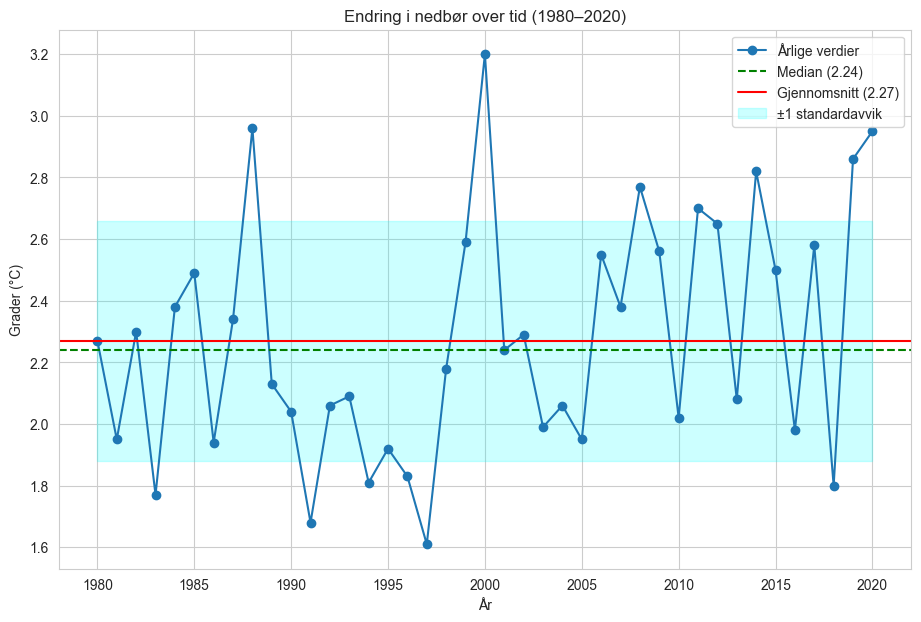

In [61]:
vis_statistikk(
    df_nedbor_renset_gjennomsnittlige_verdier["year"],
    df_nedbor_renset_gjennomsnittlige_verdier["value"],
    median=median_nedbor["Totalt"],
    gjennomsnitt=gjennomsnitt_nedbor["Totalt"],
    std=standardavvik_nedbor["Totalt"],
    tittel="Endring i nedbør over tid (1980–2020)",
    y_label="Grader (°C)"
)


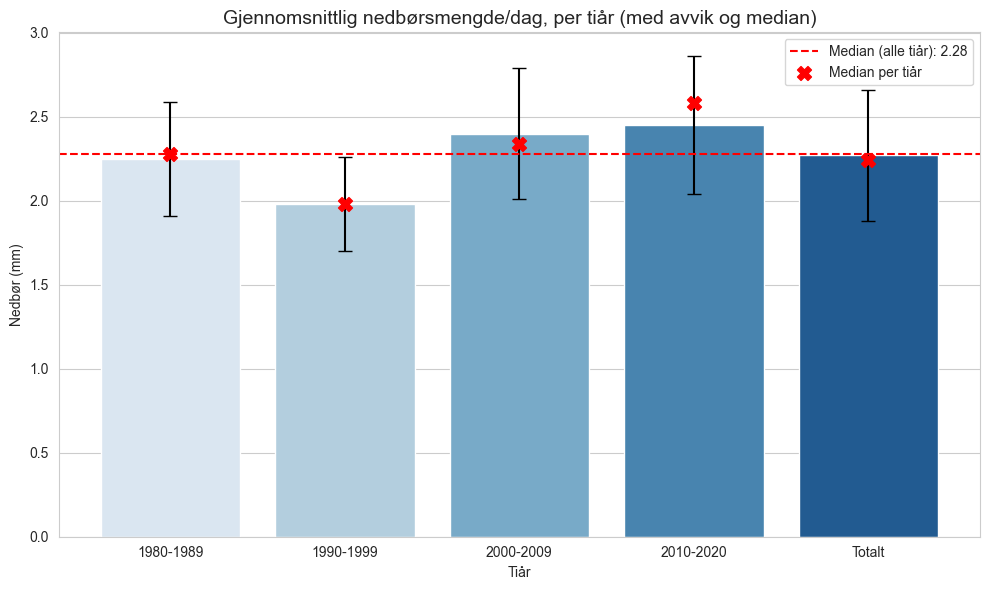

In [62]:
visualiser_statistikk_per_tiår(
    gjennomsnitt=gjennomsnitt_nedbor,
    median=median_nedbor,
    standardavvik=standardavvik_nedbor,
    tittel="Gjennomsnittlig nedbørsmengde/dag, per tiår (med avvik og median)",
    ylabel="Nedbør (mm)"
)


# Lagrer variablene til bruk i annen fil

In [63]:
%store gjennomsnitt_nedbor
%store median_nedbor
%store standardavvik_nedbor
%store df_nedbor_renset_gjennomsnittlige_verdier

Stored 'gjennomsnitt_nedbor' (dict)
Stored 'median_nedbor' (dict)
Stored 'standardavvik_nedbor' (dict)
Stored 'df_nedbor_renset_gjennomsnittlige_verdier' (DataFrame)


# Predektiv analyse av nedbør

Modellens ytelse: {'MSE': 24964.61894129434, 'R2': -0.35369964147604205}
Prediksjoner for framtidige år: [ 925.31461962  929.10642169  932.89822375  940.48182789 1020.1096713 ]


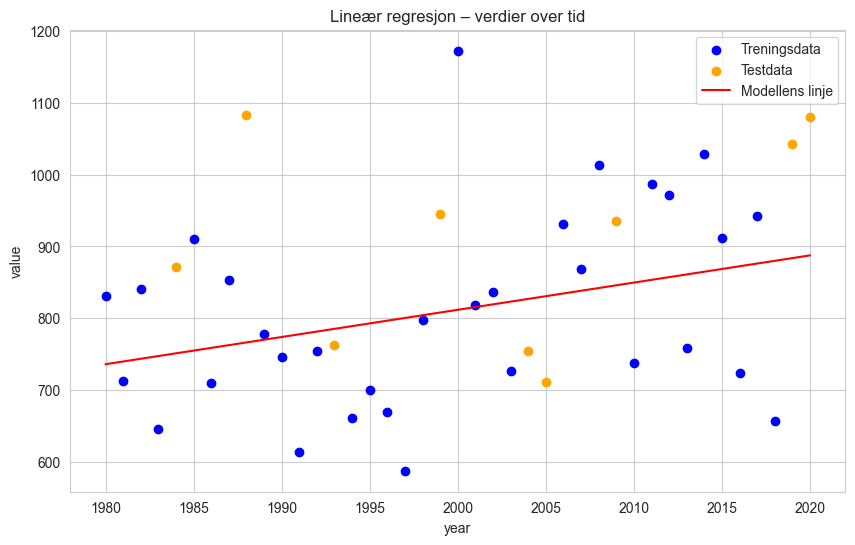

In [64]:
# Lag instans av modellen
modell = PrediktivModell(df_nedbor_renset, input_col="year", target_col="value")

# Del data
modell.del_data()

# Tren modell
modell.tren_modell()

# Evaluer
resultat = modell.evaluer()
print("Modellens ytelse:", resultat)

# Prediker fremtid
prediksjoner = modell.prediker([2030, 2031, 2032, 2034, 2055])
print("Prediksjoner for framtidige år:", prediksjoner)

# Tegn plott
modell.plott()


{'MSE': 0.18541698857161493, 'R2': -0.35353064836885406}


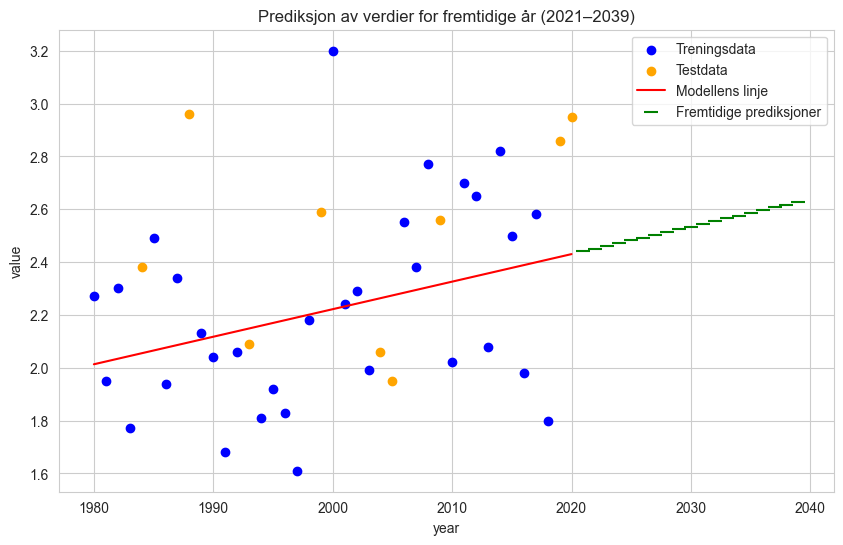

In [65]:
modell = PrediktivModell(df_nedbor_renset_gjennomsnittlige_verdier, input_col="year", target_col="value")

modell.del_data()
modell.tren_modell()

#Printer ut scoringene for prediksjonen
print(modell.evaluer())

#Vi vil prediktere for 2021-2040
framtidige_år = list(range(2021, 2040))

#Lagrer prediksjonene i en variabel for bruk senere, og visualiserer prediksjonene
nedbor_pred = modell.prediker(framtidige_år)
modell.visualiser_prediksjon_med_test(framtidige_år)



### Lagrer prediksjonene med %store

In [66]:
%store nedbor_pred


Stored 'nedbor_pred' (ndarray)
